In [42]:
# check PZFLow application
import matplotlib.pyplot as plt
import pandas as pd
import GCRCatalogs
import timeit
import numpy as np
import seaborn as sns

In [2]:
pzflow_cat = pd.read_csv('/global/cscratch1/sd/mlokken/sn_hostenv/DC2full_pzRedshifts_SFR_39iter.csv')

In [13]:
cosmo=GCRCatalogs.load_catalog("cosmoDC2_v1.1.4_small")

In [14]:
filters=['Mag_true_r_sdss_z0<-2.', 'Mag_true_r_sdss_z0>-3.']
cdc2_data = cosmo.get_quantities(['redshift', 'totalStarFormationRate'], filters=filters)


In [23]:
reduced = pzflow_cat[(pzflow_cat['Mag_true_r_sdss_z0']<-20.)&(pzflow_cat['Mag_true_r_sdss_z0']>-21.)]


In [36]:
random = np.random.choice(np.arange(len(pzflow_cat['Mag_true_r_sdss_z0'])), 800000, replace=False)
pzflow_sample = pzflow_cat.iloc[random]

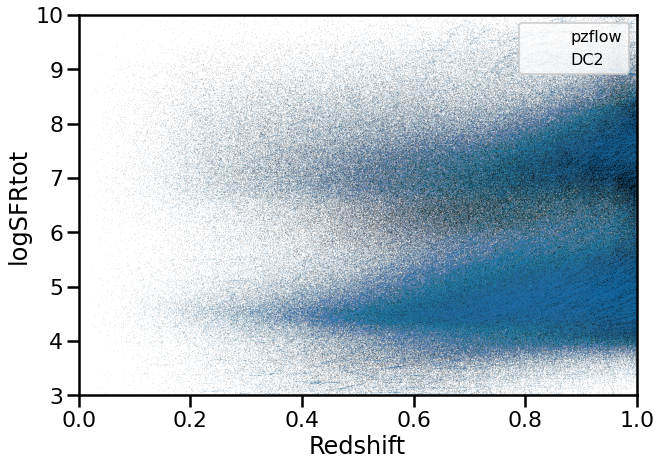

In [55]:
sns.set_context('poster')
plt.figure(figsize=(10,7))
plt.plot(pzflow_sample['PZflowredshift'], np.log10(pzflow_sample['PZflowSFRtot']), 'o', ms=.05, alpha=.5, label='pzflow', c='k')
plt.plot(pzflow_sample['DC2redshift'], np.log10(pzflow_sample['DC2SFRtot']), 'o', ms=.05, alpha=.5, label='DC2')
plt.xlim((0, 1))
plt.ylim((3, 10.0))
plt.xlabel("Redshift")
plt.ylabel("logSFRtot")
plt.legend(fontsize=16, loc='upper right')

In [ ]:
import seaborn as sns
sns.set_context("poster")

idx = onp.random.choice(np.arange(len(samples['redshift'])), size=50000, replace=False)
plt.plot(samples['redshift'].iloc[idx], samples['g-r'].iloc[idx], 'o', ms=1, alpha=.5)
plt.xlabel("z")
plt.ylabel("g-r")

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(samples['redshift'], samples['logSFRtot'], 'o', ms=0.08)
plt.xlabel("Redshift")
plt.ylabel("logSFRtot")
#plt.savefig("SFR_vs_Redshift_pzFlowOnly.png",dpi=300, bbox_inches='tight')

In [ ]:
samples_small = samples[(samples['Mag_true_r_sdss_z0'] < -2.) & (samples['Mag_true_r_sdss_z0'] > -3.)]
data_full_small = data[(data['Mag_true_r_sdss_z0'] < -2.) & (data['Mag_true_r_sdss_z0'] > -3.)]

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(data_full_small['redshift'], data_full_small['logSFRtot'], 'o', ms=0.05, label='DC2', c='k')
plt.plot(samples_small['redshift'], samples_small['logSFRtot'], 'o', ms=0.05, label='pzflow')
plt.xlim((0, 1.0))
plt.ylim((4, 10.0))
plt.xlabel("Redshift")
plt.ylabel("logSFRtot")
plt.legend(fontsize=16, loc='upper right')
#plt.savefig("SFR_vs_Redshift_pzFlow.png",dpi=300, bbox_inches='tight')

In [ ]:
#plot them again, separately 
plt.figure(figsize=(10,7))
plt.plot(samples_small['redshift'], samples_small['logSFRtot'], 'o', ms=0.05, c='k', label='pzflow')
plt.xlim((0, 1.0))
plt.ylim((4, 10.0))
plt.xlabel("Redshift")
plt.ylabel("logSFRtot")
#plt.savefig("SFR_vs_Redshift_justPZFlow.png",dpi=300, bbox_inches='tight')

In [ ]:
#plot them again, separately 
plt.figure(figsize=(10,7))
plt.plot(data_full_small['redshift'], data_full_small['logSFRtot'], 'o', ms=0.05, label='DC2', c='k')
plt.xlim((0, 1.0))
plt.ylim((4, 10.0))
plt.xlabel("Redshift")
plt.ylabel("logSFRtot")
#plt.savefig("SFR_vs_Redshift_justDC2.png",dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(samples['logSFRtot'].values - data['logSFRtot'].values, bins=500, density=True);
#plt.hist(r, bins=500, density=True, lw=3,fill=False, color='k', histtype='step');
plt.axvline(x=0, c='r')
plt.xlim((-3, 3))
plt.xlabel(r"$logSFRtot_{pred} - logSFRtot_{DC2}$");
#plt.savefig("SFRtotPred_vs_SFRtotDC2_conditionalFlow_wSFRtot.png",dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(10,7))
idx = np.arange(len(samples['redshift']))
sel = np.random.choice(idx,size=20000,replace=False)
plt.hist(samples['redshift'].iloc[sel].values - data['redshift'].iloc[sel].values, bins=500, density=True);
#plt.hist(r, bins=500, density=True, lw=3,fill=False, color='k', histtype='step');
#plt.axvline(x=0, c='r')
plt.xlim((-0.7, 0.7))
plt.xlabel(r"$z_{pred} - z_{DC2}$");
#plt.savefig("zPred_vs_zDC2_conditionalFlow_wSFRtot.png",dpi=300, bbox_inches='tight')